# Analiza danych w języku Python - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa zespołu, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

---

## Zestaw zadań 1: Elementy statystyki opisowej 1 (Notatnik 3/4)

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi

In [25]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Wczytanie danych
Wczytaj dane z przygotowanego wcześniej pliku dane.csv do tablicy `eruptions_data` w taki sposób, aby kolumna Eruption Number stanowiła indeks tablicy.

Wyświetl przygotowaną tablicę.

In [3]:
eruptions_data=pd.read_csv('eruptions_data.csv', index_col='Eruption Number')
eruptions_data

,Volcano Name,Eruption Category,VEI,Start Year,Start Month,Start Day,End Year,End Month,End Day,Evidence Type,Evidence Method
Eruption Number,,,,,,,,,,,
22486,Cotopaxi,Confirmed,2.0,2022,10.0,21.0,2022.0,12.0,19.0,Observations,Reported
22481,Taal,Confirmed,1.0,2022,10.0,5.0,2022.0,10.0,29.0,Observations,Reported
22458,Turrialba,Confirmed,1.0,2022,7.0,17.0,2022.0,7.0,17.0,Observations,Reported
22453,Ulawun,Confirmed,2.0,2022,6.0,2.0,2022.0,6.0,2.0,Observations,Reported
22454,Raung,Confirmed,2.0,2022,5.0,14.0,2022.0,9.0,27.0,Observations,Satellite (infrared)
...,...,...,...,...,...,...,...,...,...,...,...
14556,Tongariro,Confirmed,5.0,-9650,NaN,NaN,NaN,NaN,NaN,Correlation,Tephrochronology
21101,Craters of the Moon,Confirmed,0.0,-10060,NaN,NaN,NaN,NaN,NaN,Isotopic,14C (uncalibrated)
22141,Igwisi Hills,Confirmed,1.0,-10450,NaN,NaN,NaN,NaN,NaN,Isotopic,Cosmic Ray Exposure


### Zadanie 4: Konstrukcja szeregów rodzielczych - bardziej skomplikowane tablice [10 pkt]

#### a) Forma tabelaryczna
Przygotuj szeregi rozdzielcze VEI w formie tablicy `vei_data` zawierającej następujące elementy:

Indeks:
- VEI - wartości VEI posortowane od najmniejszej do największej.

Kolumny: </br>
- Nagłówki 1 poziomu:
    - Eruption category - All, Confirmed Eruption, Uncertain Eruption
- Nagłówki 2 poziomu (dla każdego z nagłówków 1 poziomu ten sam zestaw kolumn):
    - f - zliczenia poszczególnych kategorii (ang. frequency, absolute frequency),
    - cf - zliczenia skumulowane poszczególnych kategorii (ang. cumulative frequency, cumulative absolute frequency),
    - rf - częstość zliczeń poszczególnych kategorii (ang. relative frequency),
    - crf - skumulowana częstość zliczeń poszczególnych kategorii (ang. cumulative relative frequency).

Wyświetl przygotowane tablicę w taki sposób, aby liczby w kolumnach f i cf oraz indeks tablicy VEI wyświetlały się bez miejsc po przecinku, a liczby z kolumn rf i crf z dokładnością do 4 miejsca po przecinku.

In [6]:
# YOUR CODE HERE
#vei_data=eruptions_data.groupby(['Eruption Category', 'VEI']).count().rename(columns={'Volcano Name':'f'})
#vei_data=pd.DataFrame(vei_data['f'])

#vei_data['cf']=vei_data['f'].groupby('Eruption Category').cumsum()
#vei_data['rf']=vei_data['f']/vei_data['f'].groupby('Eruption Category').sum()
#vei_data['crf']=vei_data['rf'].groupby('Eruption Category').cumsum()

#print(eruptions_data['VEI'].unique())
index = pd.Index([0,1,2,3,4,5,6,7], name='VEI')

cols = pd.MultiIndex.from_tuples([ ("All eruptions", "f"), 
                                  ("All eruptions", "cf"), 
                                  ("All eruptions", "rf"),
                                  ("All eruptions", "crf"),
                                  ("Confirmed Eruptions", "f"), 
                                  ("Confirmed Eruptions", "cf"), 
                                  ("Confirmed Eruptions", "rf"),
                                  ("Confirmed Eruptions", "crf"), 
                                  ("Uncertain Eruptions", "f"), 
                                  ("Uncertain Eruptions", "cf"), 
                                  ("Uncertain Eruptions", "rf"), 
                                  ("Uncertain Eruptions", "crf")])




vei_data_1=eruptions_data.groupby('VEI').count()[['Volcano Name']]
vei_data_1.rename(columns={'Volcano Name':'f'},inplace=True)
count=sum(vei_data_1['f'])
vei_data_1['cf']=vei_data_1['f'].cumsum()
vei_data_1['rf']=vei_data_1['f']/count
vei_data_1['crf']=vei_data_1['rf'].cumsum()
vei_data_1.style.format(precision=4)


vei_data_2=eruptions_data[eruptions_data['Eruption Category']=='Confirmed']
vei_data_2=vei_data_2.groupby('VEI').count()[['Volcano Name']]
vei_data_2.rename(columns={'Volcano Name':'f'},inplace=True)
count=sum(vei_data_2['f'])
vei_data_2['cf']=vei_data_2['f'].cumsum()
vei_data_2['rf']=vei_data_2['f']/count
vei_data_2['crf']=vei_data_2['rf'].cumsum()


vei_data_3=eruptions_data[eruptions_data['Eruption Category']!='Confirmed']
vei_data_3=vei_data_3.groupby('VEI').count()[['Volcano Name']]
vei_data_3.rename(columns={'Volcano Name':'f'},inplace=True)
count=sum(vei_data_3['f'])
vei_data_3['cf']=vei_data_3['f'].cumsum()
vei_data_3['rf']=vei_data_3['f']/count
vei_data_3['crf']=vei_data_3['rf'].cumsum()


data=pd.concat([vei_data_1,vei_data_2,vei_data_3],axis=1)



vei_data = pd.DataFrame(data.values, columns=cols,index=index)

dfi.export(vei_data.style.format({('All eruptions','rf'):'{:.4f}',('All eruptions','crf'):'{:.4f}',('Confirmed Eruptions','rf'):'{:.4f}',('Confirmed Eruptions','crf'):'{:.4f}',('Uncertain Eruptions','rf'):'{:.4f}',('Uncertain Eruptions','crf'):'{:.4f}'}, precision=0), 'zliczenia.png')
vei_data.style.format({('All eruptions','rf'):'{:.4f}',('All eruptions','crf'):'{:.4f}',('Confirmed Eruptions','rf'):'{:.4f}',('Confirmed Eruptions','crf'):'{:.4f}',('Uncertain Eruptions','rf'):'{:.4f}',('Uncertain Eruptions','crf'):'{:.4f}'}, precision=0)

In [4]:
## Komórka testowa
# Test 1: Indeks
assert (vei_data.index.name == 'VEI') == True
assert list(vei_data.index) == [0, 1, 2, 3, 4, 5, 6, 7]
# Test 2: Kolumny
assert len(set(list(vei_data.columns.levels[0])) & set(['All eruptions', 'Confirmed Eruptions', 'Uncertain Eruptions'])) == 3
assert list(vei_data.columns.levels[1]) == ['cf', 'crf', 'f', 'rf']
# Test 3: Wartości w kolumnach f
assert list(vei_data['All eruptions']['f'].values) == [1007, 1384, 3991, 1152, 511, 180, 53, 7]
assert list(vei_data['Confirmed Eruptions']['f'].values) == [803, 1227, 3727, 1133, 510, 180, 53, 7]
assert list(vei_data['Uncertain Eruptions']['f'].values[:5]) == [204, 157, 264, 19, 1] 
assert np.all(np.isnan(vei_data['Uncertain Eruptions']['f'].values[5:]))

#### b) Forma graficzna
Zwizualizuj dane z przygotowanych tablic za pomocą wykresów słupkowych zliczeń (lewa oś wykresu) z nałożonymi na nie łamanymi częstości skumulowanej (prawa oś wykresu). Zestaw wykresy na pojedynczej figurze (siatka wykresów 1x3). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo ustaw:
- identyczne zakresy wartości na odpowiadających sobie osiach wszystkich trzech wykresów,
- różne od domyślnych i od siebie nawzajem kolory wykresu słupkowego oraz łamanej częstości,
- kolory lewej i prawej osi oraz ich opisów identyczne z kolorem elementu wykresu, którego dotyczą,
- format wyświetlania wartości VEI bez miejsc po przecinku.

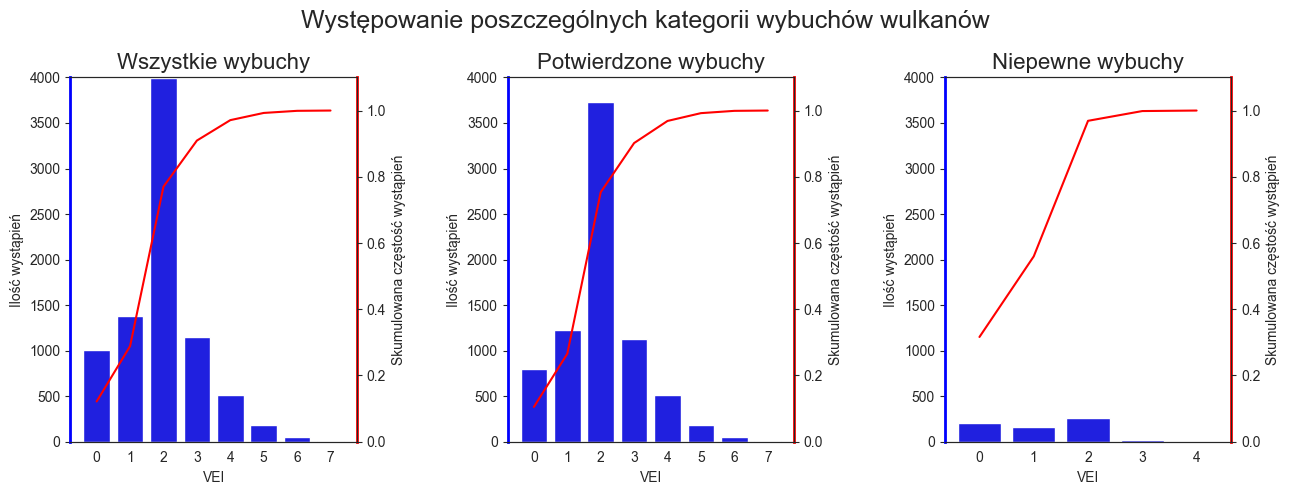

In [5]:
# YOUR CODE HERE
sns.set_style("white")
fig,ax=plt.subplots(1,3,figsize=(13,5))
fig.suptitle('Występowanie poszczególnych kategorii wybuchów wulkanów', size=18)


ax02=plt.twinx(ax[0])
ax02.set_ylim([0,1.1])
ax02.spines['left'].set_color('blue')
ax02.spines['left'].set_linewidth(2)
ax[0].set_ylim([0,4000])
ax[0].spines['right'].set_color('red')
ax[0].spines['right'].set_linewidth(2)
sns.barplot(data=vei_data['All eruptions'], x=vei_data['All eruptions'].index, y='f', ax=ax[0], color='blue')
sns.lineplot(data=vei_data['All eruptions'], x='VEI', y='crf', ax=ax02, color='red')
ax[0].set_title('Wszystkie wybuchy', size=16)
ax[0].set_ylabel('Ilość wystąpień')
ax02.set_ylabel('Skumulowana częstość wystąpień')

ax12=plt.twinx(ax[1])
ax12.set_ylim([0,1.1])
ax12.spines['left'].set_color('blue')
ax12.spines['left'].set_linewidth(2)
ax[1].set_ylim([0,4000])
ax[1].spines['right'].set_color('red')
ax[1].spines['right'].set_linewidth(2)
sns.barplot(data=vei_data['Confirmed Eruptions'], x=vei_data['Confirmed Eruptions'].index, y='f', ax=ax[1], color='blue')
sns.lineplot(data=vei_data['Confirmed Eruptions'], x='VEI', y='crf', ax=ax12, color='red')
ax[1].set_title('Potwierdzone wybuchy', size=16)
ax[1].set_ylabel('Ilość wystąpień')
ax12.set_ylabel('Skumulowana częstość wystąpień')

ax22=plt.twinx(ax[2])
ax22.set_ylim([0,1.1])
ax22.spines['left'].set_color('blue')
ax22.spines['left'].set_linewidth(2)
ax[2].set_ylim([0,4000])
ax[2].spines['right'].set_color('red')
ax[2].spines['right'].set_linewidth(2)
sns.barplot(data=vei_data['Uncertain Eruptions'], x=vei_data['Uncertain Eruptions'].index, y='f', ax=ax[2], color='blue')
sns.lineplot(data=vei_data['Uncertain Eruptions'], x='VEI', y='crf', ax=ax22, color='red')
ax[2].set_title('Niepewne wybuchy', size=16)
ax[2].set_ylabel('Ilość wystąpień')
ax22.set_ylabel('Skumulowana częstość wystąpień')

fig.savefig("wykresy.png")

fig.tight_layout(w_pad=3)
plt.show()

### Zadanie 5: Rodzaje metod wykrywania erupcji [10 pkt]

Przygotuj tablice `evidence_data` zawiarającą informacje o tym ile erupcji o poszczególnych wartościach VEI zostało potwierdzonych przy użyciu poszczególnych metod weryfikacji.
Tablica powinna zawierać następujące elementy:

Indeks:
- Nagłówki 1 poziomu
    - kategoria dowodów
- Nagłówki 2 poziomu:
    - metoda, która dostarczyła dowodów

Kolumny: </br>
- VEI - wartości VEI posortowane od najmniejszej do największej oraz kolumna "All", w której znajdują się dane dotyczące wszystkich erupcji, bez podziału na VEI.

Wyświetl przygotowane tablicę w taki sposób, aby zawarte w tablicy liczby (w tym wartości VEI w nagłówkach kolumn) wyświetlały się bez miejsc po przecinku.

In [10]:

indx = pd.MultiIndex.from_product([eruptions_data['Evidence Type'].unique(), eruptions_data['Evidence Method'].unique()])
cols = pd.Index([0,1,2,3,4,5,6,7, 'All'], name='VEI')

evidence_data = pd.DataFrame(index = indx, columns = cols)

for i in eruptions_data['Evidence Type'].unique():
    for j in eruptions_data['Evidence Method'].unique():
        suma = 0
        for k in [0,1,2,3,4,5,6,7]:
            temp = len(eruptions_data[(eruptions_data['Evidence Type']==i) & (eruptions_data['Evidence Method']==j) & (eruptions_data['VEI']==k)])
            evidence_data[k][i,j] = temp
            suma += temp
        evidence_data['All'][i,j] = suma

evidence_data = evidence_data[evidence_data['All'] != 0]
evidence_data

VEI                                  0     1     2    3    4   5   6  7   All
Observations Reported              376  1200  3430  837  194  42   7  1  6087
             Satellite (infrared)    1     0     1    1    0   0   0  0     3
             Satellite (visual)      0     2     3    1    0   0   0  0     6
             Seismicity             15     0     1    0    0   0   0  0    16
             Hydrophonic            68     3     0    0    0   0   0  0    71
             Photo / Video           1     1     1    0    0   0   0  0     3
             Aviation                0     1     0    0    0   0   0  0     1
Uncertain    Unspecified           204   138   271   22    1   0   0  0   636
Isotopic     Uranium-series         24     0     0    0    0   0   0  0    24
             14C (calibrated)       41    12    49  100  105  70  21  3   401
             14C (uncalibrated)    125     7    34   54   91  41  19  1   372
             Cosmic Ray Exposure    20     1     0    0    1   0   0  0    22
             Ar/Ar                  12     1     0    0    1   1   0  0    15
             K/Ar                   10     0     0    1    0   0   0  0    11
Correlation  Magnetism              34     0     5    0    2   0   0  0    41
             Tephrochronology       71    16   122  124  103  22   5  0   463
             Anthropology            4     1     5    2    6   1   0  0    19
Sidereal     Varve Count             0     1    66    8    1   0   0  0    76
             Dendrochronology        0     0     0    1    2   3   0  0     6
             Ice Core                0     0     3    0    3   0   1  2     9
Radiogenic   Fission track           0     0     0    1    0   0   0  0     1
             Thermoluminescence      1     0     0    0    1   0   0  0     2

In [11]:
# Test 1 Kształt tablicy
assert evidence_data.shape == (22, 9)
# # Test 2 Kolumny
assert len(set(list(evidence_data.columns)) & set([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 'All'])) == 9
# Test 3 Indeks
assert (eruptions_data.index.name == 'Eruption Number') == True
assert len(set(list(evidence_data.index)) & set([('Observations', 'Reported'), ('Observations', 'Satellite (infrared)'), ('Observations', 'Satellite (visual)'),
                                ('Observations', 'Seismicity'), ('Observations', 'Hydrophonic'), ('Observations', 'Photo / Video'), ('Observations', 'Aviation'),
                                ('Uncertain', 'Unspecified'), ('Isotopic', 'Uranium-series'), ('Isotopic', '14C (calibrated)'), ('Isotopic', '14C (uncalibrated)'),
                                ('Isotopic', 'Cosmic Ray Exposure'), ('Isotopic', 'Ar/Ar'), ('Isotopic', 'K/Ar'), ('Correlation', 'Magnetism'), ('Correlation', 'Tephrochronology'),
                                ('Correlation', 'Anthropology'), ('Sidereal', 'Varve Count'), ('Sidereal', 'Dendrochronology'), ('Sidereal', 'Ice Core'), ('Radiogenic', 'Fission track'),
                                ('Radiogenic', 'Thermoluminescence')])) == 22
# Test 4 Kilka losowo wybranych wartości w tablicy
assert evidence_data.loc[('Observations', 'Reported'), 0] == 376
assert evidence_data.loc[('Uncertain', 'Unspecified'), 3] == 22
assert evidence_data.loc[('Sidereal', 'Ice Core'), 7] == 2
assert evidence_data.loc[('Isotopic', '14C (uncalibrated)'), 5] == 41
assert evidence_data.loc[('Correlation', 'Anthropology'), 6] == 0

### Zadanie 6: Wizualizacja rozkładu zarejestrowanych erupcji w czasie [2 pkt]

Korzystając z funkcji `seaborn.stripplot()` zwizualizuj jak rozkładały się w czasie wystąpienia zarejestrowanych erupcji. Do rozróżnienia erupcji w czasie wykorzystaj rok, w którym nastąpił ich początek.

Wyniki zestaw na pojedynczej figurze (siatka wykresów 2x1). Na górnym wykresie przedstaw dane rozróżnione tylko po kątem VEI, a na dolnym wykresie przedstaw dane rozróżnione zarówno po VEI jak i rodzaju dowodu ich wystąpienia (Evidence Type). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- dodaj legendę do dolnego wykresu w taki sposób, aby nie zasłaniała znajdujących nię na nim danych,
- ustaw format wyświetlania wartości VEI bez miejsc po przecinku.

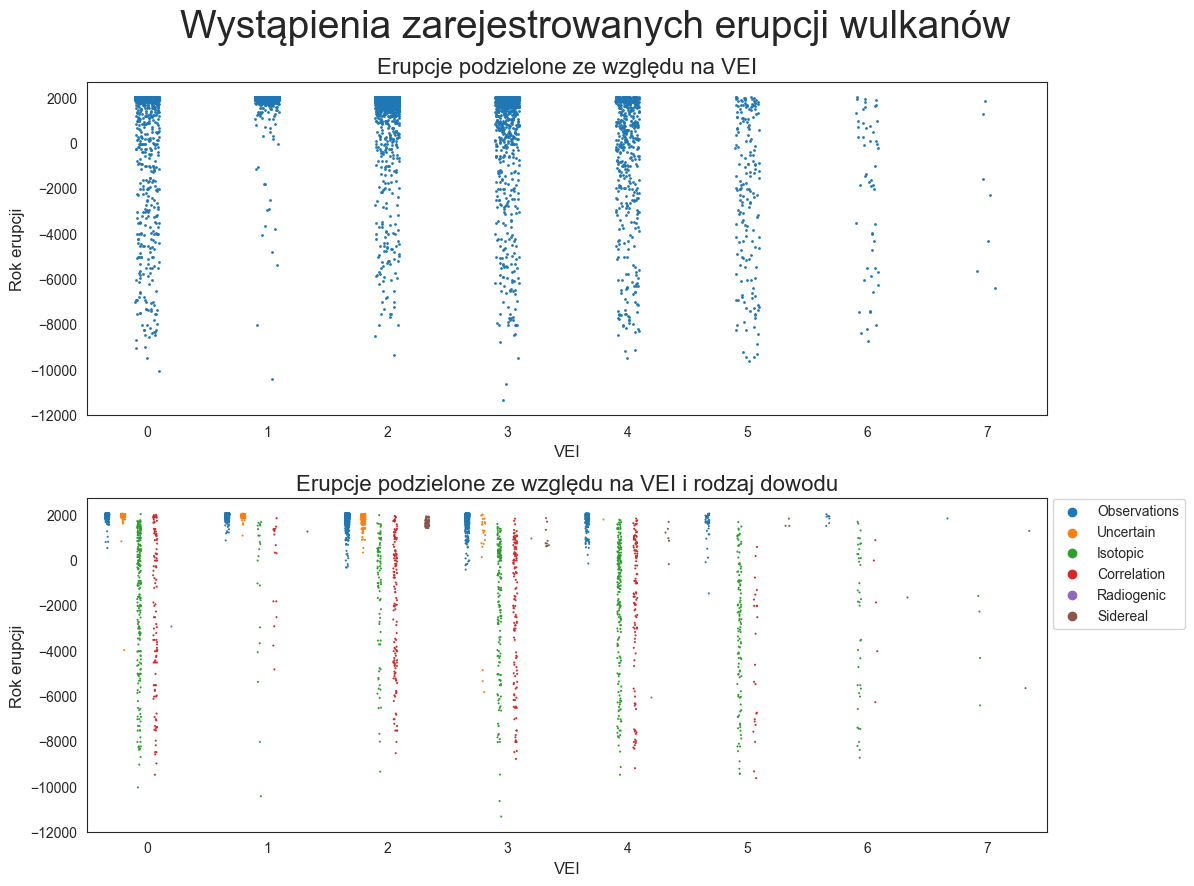

In [8]:
# YOUR CODE HERE
# YOUR CODE HERE
sns.set_style("white")
fig,ax=plt.subplots(2,1,figsize=(12,9))
fig.suptitle('Wystąpienia zarejestrowanych erupcji wulkanów', size=28)

sns.stripplot(data=eruptions_data,x="VEI",y="Start Year",s=2,ax=ax[0])
ax[0].xaxis.set_major_formatter(lambda x,pos:int(x))
ax[0].set_xlabel("VEI",size=12)
ax[0].set_ylabel("Rok erupcji",size=12)
ax[0].set_title("Erupcje podzielone ze względu na VEI",size=16)


sns.stripplot(data=eruptions_data,x="VEI",y="Start Year",s=1.5,ax=ax[1],hue="Evidence Type",dodge=True)
ax[1].xaxis.set_major_formatter(lambda x,pos:int(x))
ax[1].set_xlabel("VEI",size=12)
ax[1].set_ylabel("Rok erupcji",size=12)
ax[1].set_title("Erupcje podzielone ze względu na VEI i rodzaj dowodu",size=16)
ax[1].legend(bbox_to_anchor=(1.15, 1.02),loc="upper right")
fig.tight_layout()
fig.savefig("wykresy2.png")

plt.show()


#raise NotImplementedError()